In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import and show the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Dataset/Dataset_Qult_and_SF.csv')
dataset = dataset[['PGA(g)','B(m)','DF(m)','Y(kN/m3)','Beban(kN)','SF']]
dataset.head()

,PGA(g),B(m),DF(m),Y(kN/m3),Beban(kN),SF
0,0.0,0.5,0.5,17,50,2.25
1,0.0,0.6,0.5,17,50,2.46
2,0.0,0.7,0.5,17,50,2.51
3,0.0,0.8,0.5,17,50,2.54
4,0.0,0.9,0.5,17,50,2.66


In [ ]:
# Remove missing values from the dataset
dataset.dropna()
print(len(dataset))

3840


*The dataset doesn't contain any missing values.*

In [ ]:
# Remove duplicates from the dataset
dataset.drop_duplicates(inplace=True)
print(len(dataset))

3840


*The dataset doesn't contain any duplicate records.*

In [ ]:
# Show the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PGA(g)     3840 non-null   float64
 1   B(m)       3840 non-null   float64
 2   DF(m)      3840 non-null   float64
 3   Y(kN/m3)   3840 non-null   int64  
 4   Beban(kN)  3840 non-null   int64  
 5   SF         3840 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 180.1 KB


*The dataset has no inconsistent data, we can see that the datatype of each column is numerical, not object*.

In [ ]:
# Show the descriptive analytics from the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PGA(g),3840.0,0.40000,0.393752,0.00,0.075,0.30,0.625,1.00
B(m),3840.0,2.09375,0.661967,0.50,1.600,2.20,2.625,3.00
DF(m),3840.0,1.18750,0.634388,0.50,0.500,1.00,1.500,2.50
Y(kN/m3),3840.0,19.00000,1.633206,17.00,17.000,19.00,21.000,21.00
Beban(kN),3840.0,125.00000,55.908980,50.00,87.500,125.00,162.500,200.00
SF,3840.0,2.34417,0.879235,1.07,1.680,2.18,2.760,6.62


*The descriptive statistics of the dataset are generally good, but if we focus on the 'SF' column (output variable), the gap between the 3rd quartile and 4th quartile is way higher than the gap 1st-2nd and 2nd-3rd quartile gap. With that being said, there might be some outliers that lies in this dataset.*

In [ ]:
# Find indicated outliers using IQR
Q1 = dataset['SF'].quantile(0.25)
Q3 = dataset['SF'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(dataset['SF'] >= upper)[0]
lower_array = np.where(dataset['SF'] <= lower)[0]

# Removing the outliers
dataset.drop(index=upper_array, inplace=True)
dataset.drop(index=lower_array, inplace=True)

# Show the amount of outliers in the dataset
print('Jumlah data bernilai lebih dari batas atas  :', len(upper_array))
print('Jumlah data bernilai kurang dari batas bawah:', len(lower_array))
print('Jumlah data pada dataset bersih             :', len(dataset))

Jumlah data bernilai lebih dari batas atas  : 125
Jumlah data bernilai kurang dari batas bawah: 0
Jumlah data pada dataset bersih             : 3715


*There's 125 values that are higher than the upper limit, but these values are not considered as 'global outliers', because the 'SF' values of 6-ish are still make sense in this research. Hence, we don't need to remove those values.*

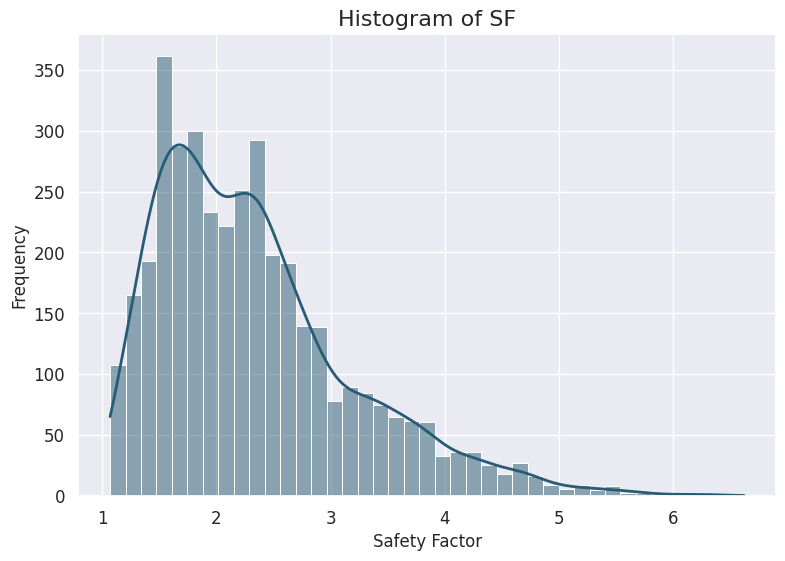

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with Seaborn using a custom color
plt.figure(figsize=(9, 6))
sns.set_theme(style="darkgrid")

sns.histplot(
    data=dataset, x='SF', kde=True,
    color='#285c74',  # Histogram bar color
    edgecolor='white', linewidth=0.7,
    line_kws={'color': 'red', 'linewidth': 2}  # Correct way to set KDE line color
)

# Add title and labels
plt.title('Histogram of SF', fontsize=16)
plt.xlabel('Safety Factor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks for better aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


*From the histogram above, we can see that the distribution of the 'SF' vaariable is right-skewed. It means that this target is dominated by the lower values.*

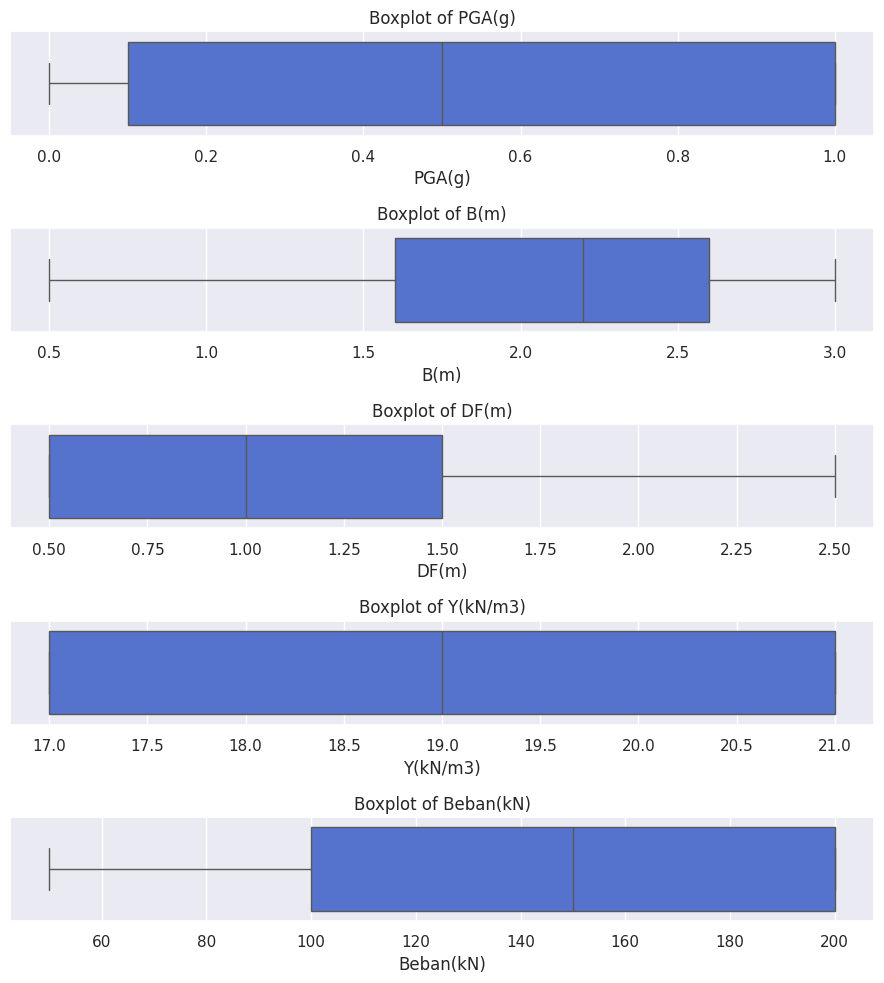

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Define the features to plot
features = ['PGA(g)', 'B(m)', 'DF(m)', 'Y(kN/m3)', 'Beban(kN)']

# Create separate boxplots for each feature
plt.figure(figsize=(9, 10))

for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.boxplot(x=dataset[feature], orient='h', color='royalblue')
    plt.title(f'Boxplot of {feature}', fontsize=12)

plt.tight_layout()
plt.show()


*From the collection of boxplots above, we can see that each feature in this dataset has no outliers, because there is no dot in each boxplot.*

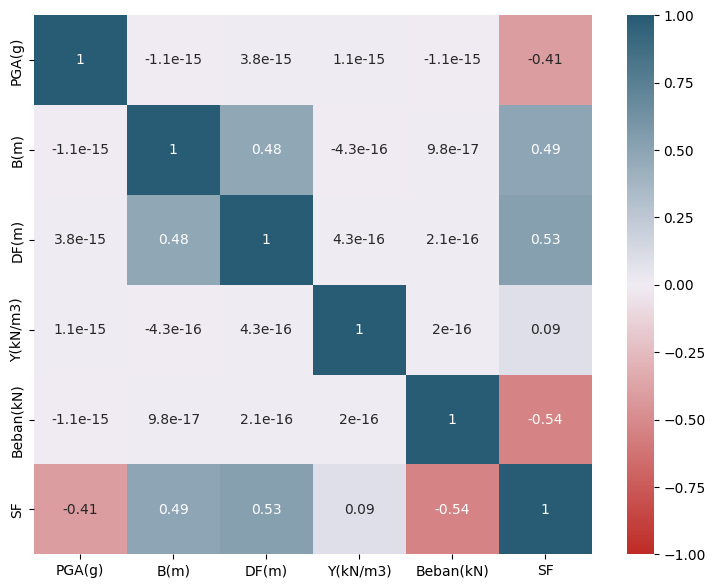

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Calculate correlation
corr = dataset.corr()

# Define custom colormap from #be2b26 (-1) to #285c74 (1)
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#be2b26", "#f0ecf4", "#285c74"])

# Increase canvas size
plt.figure(figsize=(9, 7))

# Display correlation heatmap with the custom colormap
sns.heatmap(corr, cmap=custom_cmap, annot=True, vmin=-1.0, vmax=1.0)

# Show the plot
plt.show()


*The heatmap above shows us the correlation between every variables available in this dataset. 'B(m)' and 'DF(m)' variables have a decent positive correlation with the target (SF), which means--the higher B(m) and DF(m) values, the output value is going to be higher. In the opposite way, 'PGA(g)' and 'Beban(kN)' have a quite high negative correlation. The 'Y(kN/m3)' variable has a very low positive correlation with the output, it indicates that this variable is not going to be really impactful to this analysis. However, we decided to use this variable still.*

# **Export Clean Dataset**

In [ ]:
# Save the clean dataset into csv file
dataset.to_csv('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Dataset/SF_clean_dataset.csv', index=False)